In [6]:
%matplotlib inline 
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("GOOG.csv", index_col = "Date", parse_dates = True)

### To convert Date column to Date time data type
data.Date = pd.to_datetime(data.Date)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4.274000e+03
mean,611.688709,617.601982,605.851788,611.927883,611.927883,6.578646e+06
std,514.352583,519.393652,510.123645,515.110854,515.110854,7.850513e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.922000e+03
25%,244.051483,246.447502,240.616856,243.689091,243.689091,1.613900e+06
50%,388.165070,391.320724,385.270905,389.198685,389.198685,3.906488e+06
75%,911.799988,920.392517,908.020997,913.500000,913.500000,8.335476e+06
max,2800.219971,2800.219971,2753.020020,2792.889893,2792.889893,8.254163e+07


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4274 entries, 2004-08-19 to 2021-08-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4274 non-null   float64
 1   High       4274 non-null   float64
 2   Low        4274 non-null   float64
 3   Close      4274 non-null   float64
 4   Adj Close  4274 non-null   float64
 5   Volume     4274 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 233.7 KB


In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [11]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-04,2724.989990,2730.760010,2708.300049,2720.570068,2720.570068,826400
2021-08-05,2720.570068,2739.000000,2712.000000,2738.800049,2738.800049,593300
2021-08-06,2725.899902,2741.601074,2720.929932,2740.719971,2740.719971,678000
2021-08-09,2738.979980,2766.429932,2728.574951,2760.040039,2760.040039,618700
2021-08-10,2761.590088,2771.030029,2744.530029,2761.929932,2761.929932,801700


In [12]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
import matplotlib.pyplot as plt

#### type() method returns class type of the argument(object) passed as parameter. type() function is mostly used for debugging purposes

In [14]:
type(data)

pandas.core.frame.DataFrame

# Time series Data
A time series is a sequence of numerical data points taken at sucessive equally spaced data points in time. In investingm a time series tracks movement of stock price, over a specified period of time.

In [15]:
import matplotlib.dates as mdates

## line plot for 2004 to 2021

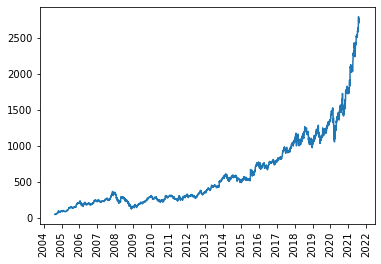

In [16]:

plt.plot(data.index, data['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
# plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

# Zooming in

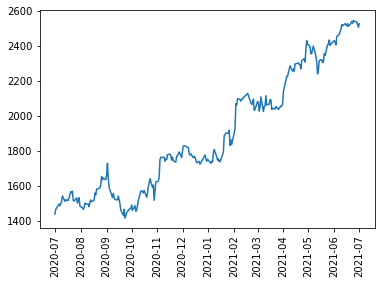

In [17]:
data_2020_21 = data.loc[pd.Timestamp("2020-07-1"):pd.Timestamp("2021-07-1")]
plt.plot(data_2020_21.index, data_2020_21['Adj Close'])
# plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation = 90)
plt.show()

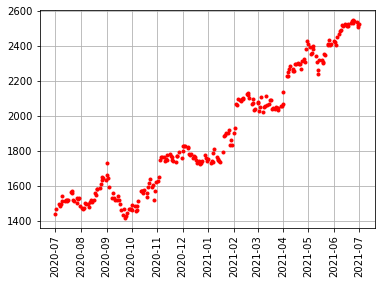

In [18]:
plt.plot(data_2020_21.index,data_2020_21['Adj Close'],'.', color = 'r')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation = 90)
plt.show()

## Resampling for 4 months in 2020-21

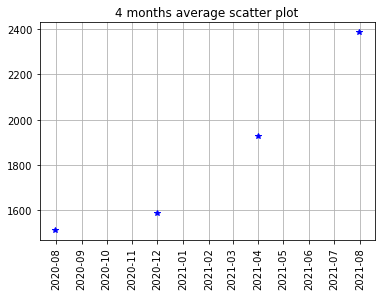

In [19]:
data_resample_4M = data_2020_21.resample('4M').mean()
plt.plot(data_resample_4M.index, data_resample_4M['Adj Close'],'*',color = 'b')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation = 90)
plt.title("4 months average scatter plot")
plt.show()

In [20]:
data_resample_W = data.loc[pd.Timestamp('2020-11-01'):pd.Timestamp('2021-08-01')]

## Resampling weekly

In [21]:
data_resample_W = data_resample_W.resample('W').mean()
data_resample_W.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-08,1701.034009,1731.981006,1685.908008,1710.097998,1710.097998,2298940
2020-11-15,1755.450000,1778.918018,1742.967017,1756.591992,1756.591992,1783160
2020-11-22,1763.491968,1780.225977,1751.938989,1760.884009,1760.884009,1426160
2020-11-29,1756.519989,1777.010010,1743.597473,1767.089996,1767.089996,1417575
2020-12-06,1800.436792,1825.780981,1790.696606,1808.309985,1808.309985,1477640


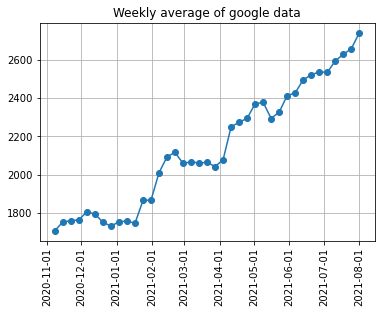

In [22]:
plt.plot(data_resample_W.index, data_resample_W['Adj Close'], '-o')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation = 90)
plt.title('Weekly average of google data')
plt.show()

## Creating a new column namely diff where
### diff = open - close

In [23]:
data['diff'] = data['Open'] - data['Close']
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,-0.169365
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,-3.636368
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,0.672482
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,3.173103
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,-0.518059
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620,-1.474472
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307,0.971360
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221498,1.628895
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252,-0.034870


In [24]:
a = data.iloc[[data['diff'].argmax()]].first_valid_index()

data.index.get_loc(a)

4165

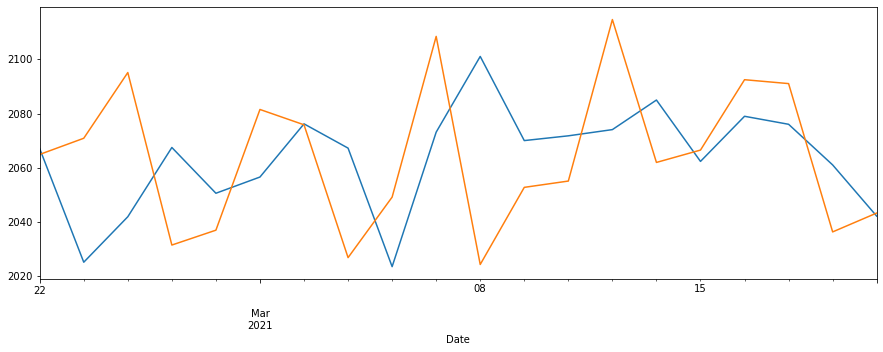

In [25]:
data.iloc[4155:4175]['Open'].plot(figsize = (15,5))
data.iloc[4155:4175]['Close'].plot()
plt.show()

In [26]:
data_weekly_mean = data.resample('W').mean()

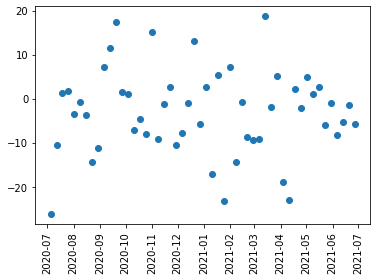

In [27]:
plt.scatter(data_weekly_mean['2020-07-1':'2021-07-1'].index, data_weekly_mean['2020-07-1':'2021-07-1']['diff'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
#plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation = 90)
plt.show()

# Step 3: Moving Windows

## Daily percentages

$r_{t}$ = ($p_{t}$ / $p_{t-1}$) - 1



In [28]:
daily_close = data['Adj Close']

# Daily returns
daily_pct_change = daily_close.pct_change()
# daily_pct_change = (data['Close']/data['Close'].shift(1)) - 1


# Replace NA values with 0
daily_pct_change.fillna(0,inplace = True)
daily_pct_change.head()

Date
2004-08-19    0.000000
2004-08-20    0.079430
2004-08-23    0.010064
2004-08-24   -0.041408
2004-08-25    0.010775
Name: Adj Close, dtype: float64

In [29]:
daily_pct_change.isnull().sum()

0

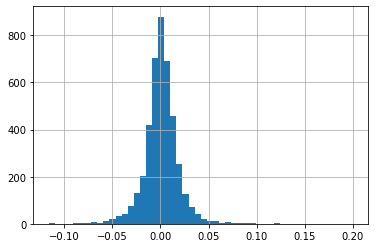

In [30]:
daily_pct_change.hist(bins = 50)
plt.show()

# Step 4: Volatility

1. The Volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time.
2. To compare the volatility of a stock with another stock to get a feel for which may have less risk or to a market index to examin the stocks volatility in the overall market. 
3. Generally, the higher the volatility, the riskier the investment in that stock.

In [31]:
min_periods = 75

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)

vol.fillna(0,inplace = True)
vol.tail()

Date
2021-08-04    0.103323
2021-08-05    0.103228
2021-08-06    0.103210
2021-08-09    0.102393
2021-08-10    0.100733
Name: Adj Close, dtype: float64

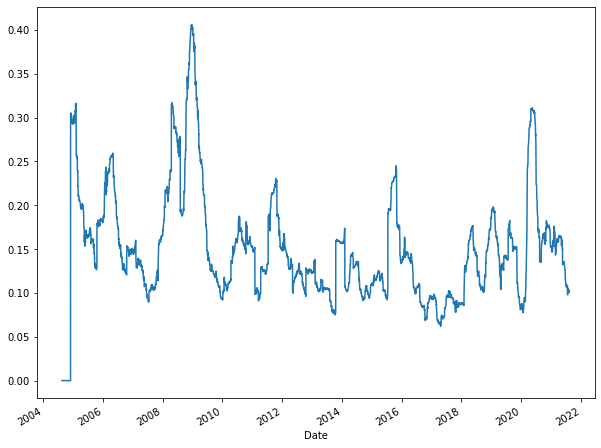

In [32]:
vol.plot(figsize = (10,8))
plt.show()

# Rolling means (Trends and Seasonality)

In [33]:
data_adj_close_px = data['Adj Close']

# Short moving window rolling mean
data['50'] = data_adj_close_px.rolling(window = 50).mean()

# Long moving window rolling mean
data['200'] = data_adj_close_px.rolling(window = 200).mean()

In [34]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,diff,50,200
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,-0.169365,NaN,NaN
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,-3.636368,NaN,NaN
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,0.672482,NaN,NaN
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,3.173103,NaN,NaN
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,-0.518059,NaN,NaN


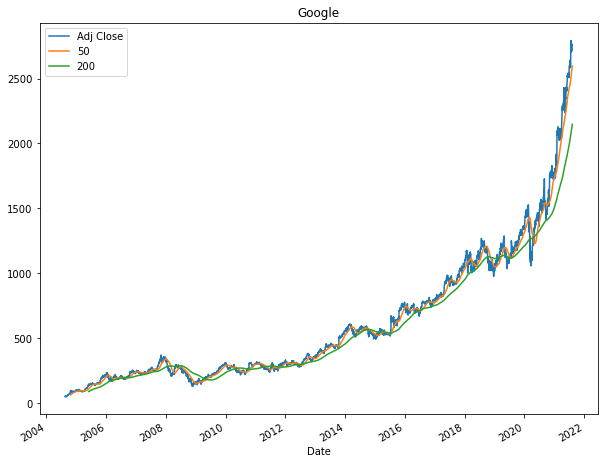

In [35]:
# Plot the adjusted closing price, the short and long windows of rolling means
data[['Adj Close','50','200']].plot(title = "Google",figsize = (10,8))

# Show plot
plt.show()

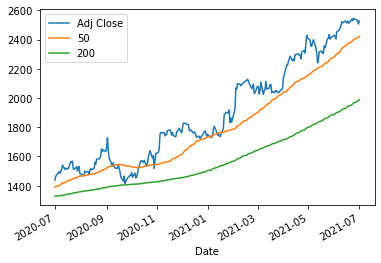

In [36]:
data.loc['2020-07-01':'2021-07-01'][['Adj Close','50','200']].plot();

In [37]:
pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in c:\users\sony\anaconda3\lib\site-packages (0.12.7a17)
Note: you may need to restart the kernel to use updated packages.


In [38]:
import mplfinance as mpf

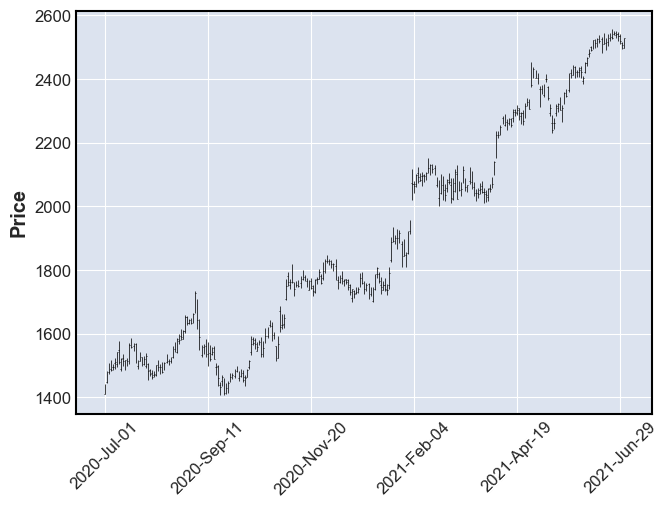

In [39]:
mpf.plot(data_2020_21)

In [40]:
data_3M = data.loc[pd.Timestamp("2021-04-1"):pd.Timestamp("2021-07-1")]

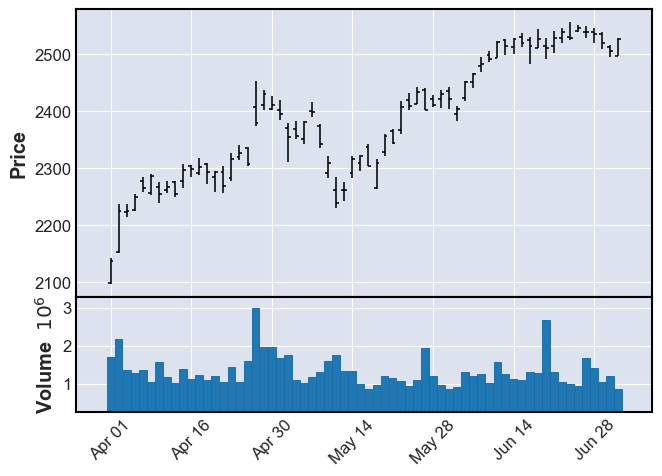

In [41]:
mpf.plot(data_3M, volume = True)

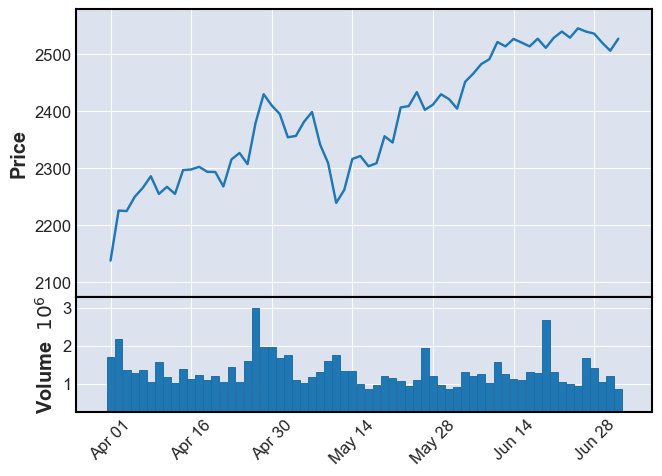

In [42]:
mpf.plot(data_3M, type = 'line', volume = True)

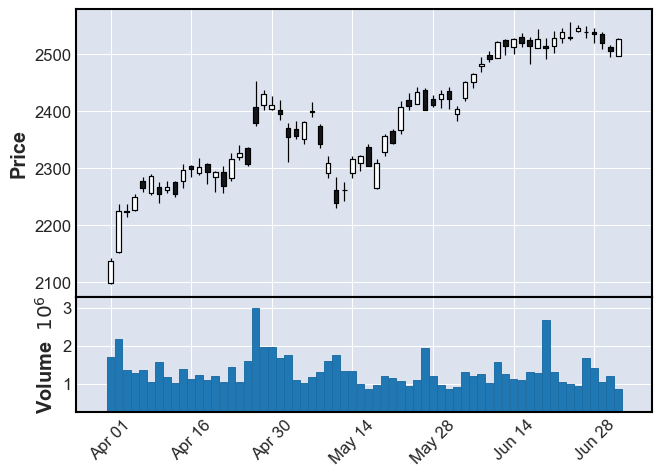

In [43]:
mpf.plot(data_3M, type = 'candle', volume = True)

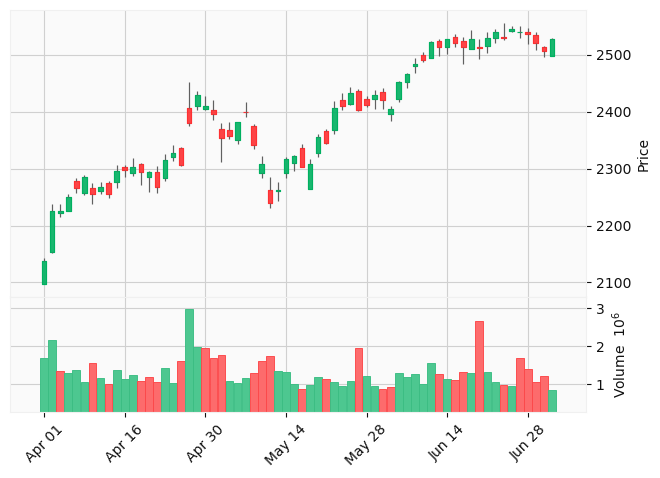

In [44]:
mpf.plot(data_3M, type = 'candle', volume = True, style = 'yahoo')

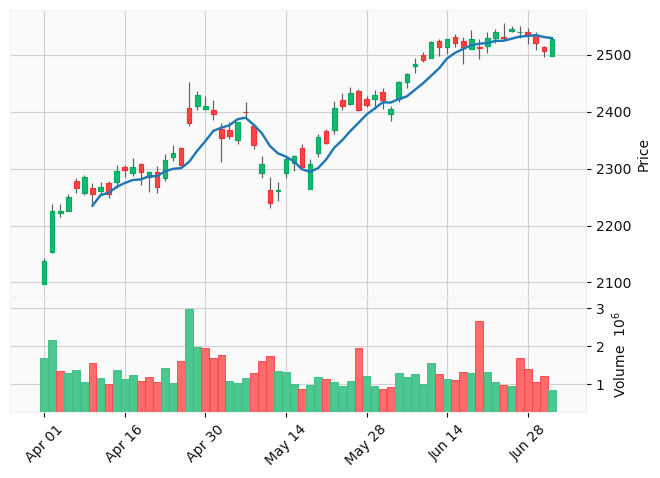

In [45]:
mpf.plot(data_3M, type = 'candle', style = 'yahoo',mav = (7),volume = True)

In [46]:
data_20 = data.loc[pd.Timestamp("2020-01-1"):pd.Timestamp("2020-12-31")]
data_19 = data.loc[pd.Timestamp("2019-01-1"):pd.Timestamp("2019-12-31")]
data_18 = data.loc[pd.Timestamp("2018-01-1"):pd.Timestamp("2018-12-31")]
data_17 = data.loc[pd.Timestamp("2017-01-1"):pd.Timestamp("2017-12-31")]
data_16 = data.loc[pd.Timestamp("2016-01-1"):pd.Timestamp("2016-12-31")]
data_15 = data.loc[pd.Timestamp("2015-01-1"):pd.Timestamp("2015-12-31")]

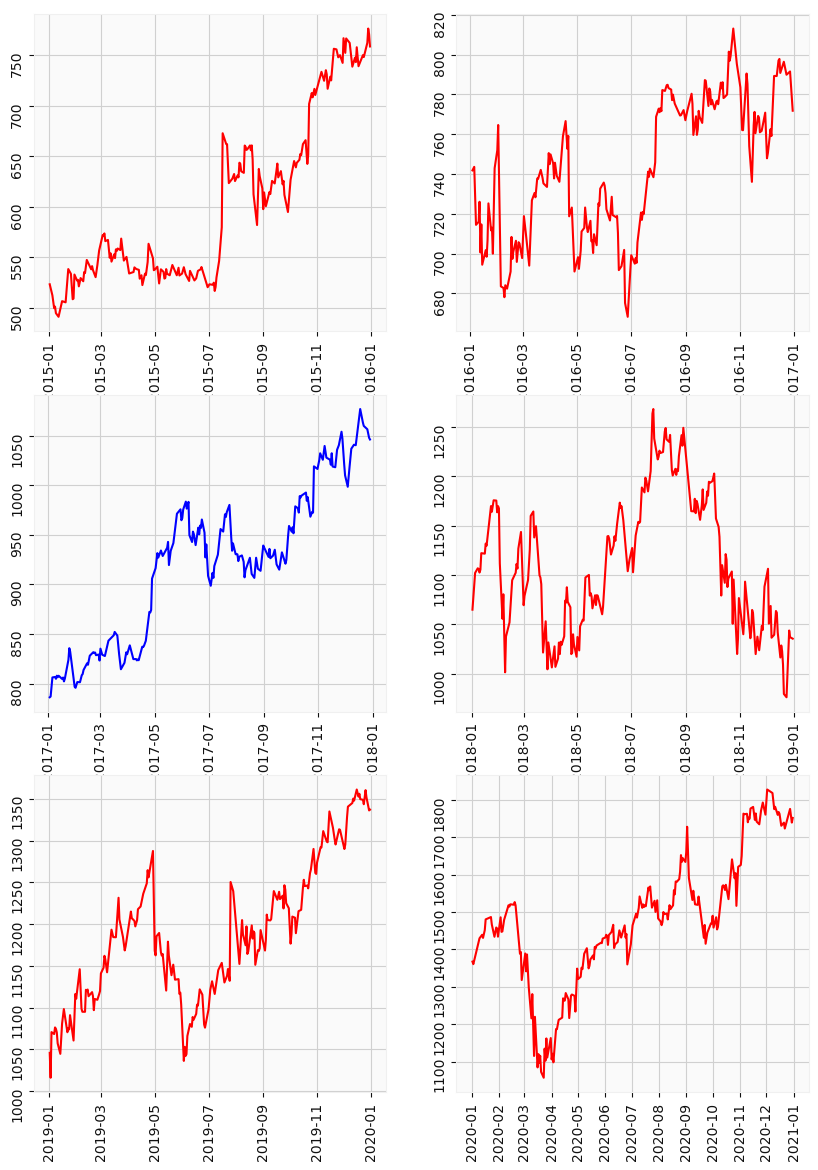

In [47]:
f, ax = plt.subplots(3,2,figsize = (10,14))

f.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
f.gca().xaxis.set_major_locator(mdates.MonthLocator())



ax[0,0].plot(data_15.index,data_15['Adj Close'],color = 'r')
ax[0,0].tick_params(labelrotation = 90)


ax[0,1].plot(data_16.index,data_16['Adj Close'],color = 'r')
ax[0,1].tick_params(labelrotation = 90)



ax[1,0].plot(data_17.index,data_17['Adj Close'],color = 'b')
ax[1,0].tick_params(labelrotation = 90)


ax[1,1].plot(data_18.index,data_18['Adj Close'],color = 'r')
ax[1,1].tick_params(labelrotation = 90)

ax[2,0].plot(data_19.index,data_19['Adj Close'],color = 'r')
ax[2,0].tick_params(labelrotation = 90)



ax[2,1].plot(data_20.index,data_20['Adj Close'],color = 'r')
ax[2,1].tick_params(labelrotation = 90)



In [48]:
pip install --upgrade pandas_datareader

Requirement already up-to-date: pandas_datareader in c:\users\sony\anaconda3\lib\site-packages (0.10.0)
Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas_datareader.data as web
import datetime


In [50]:
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,6,1)

In [51]:
google = web.DataReader("GOOG",'yahoo',start,end)

In [52]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,1758.930054,1735.420044,1735.420044,1751.880005,1011900,1751.880005
2021-01-04,1760.650024,1707.849976,1757.540039,1728.239990,1901900,1728.239990
2021-01-05,1747.670044,1718.015015,1725.000000,1740.920044,1145300,1740.920044
2021-01-06,1748.000000,1699.000000,1702.630005,1735.290039,2602100,1735.290039
2021-01-07,1788.400024,1737.050049,1740.060059,1787.250000,2265000,1787.250000


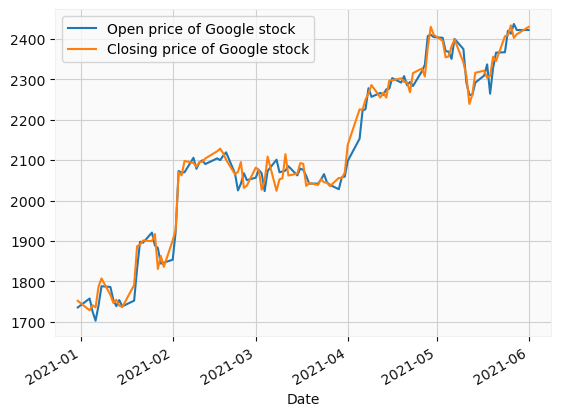

In [53]:
google.Open.plot(label = 'Open price of Google stock')
google.Close.plot(label = 'Closing price of Google stock')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

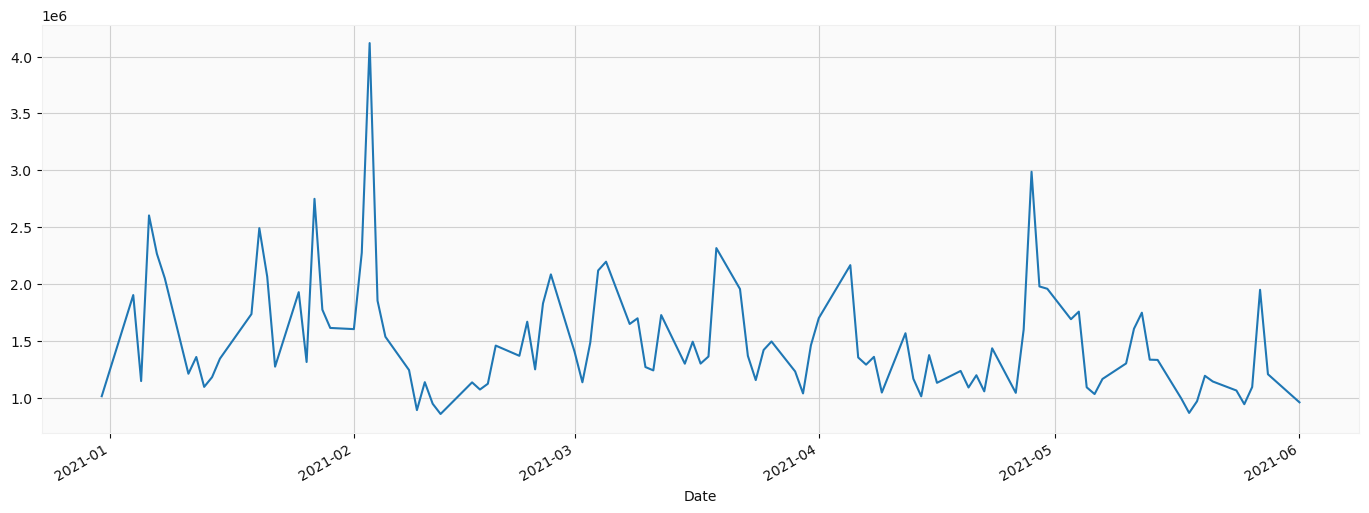

In [54]:
google['Volume'].plot(figsize = (17,6))

In [55]:
google.to_csv('Goolge_Stock.csv')

In [56]:
%matplotlib inline

In [57]:
a = google.iloc[[google['Volume'].argmax()]].first_valid_index()

In [58]:
a

Timestamp('2021-02-03 00:00:00')

In [59]:
google.index.get_loc(a)

22

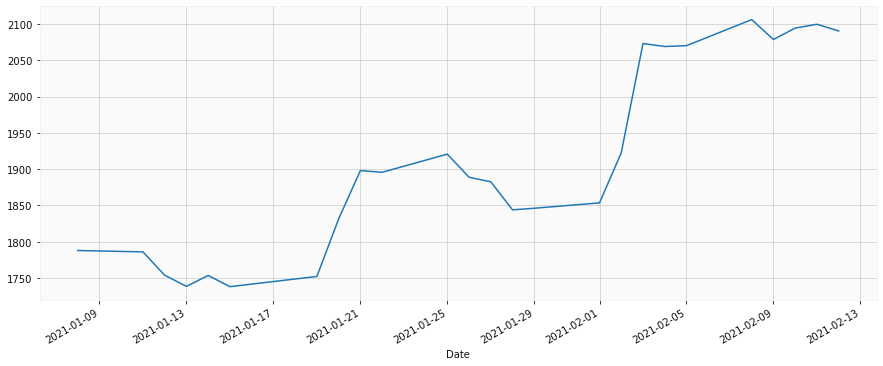

In [60]:
google.iloc[5:30]['Open'].plot(figsize = (15,6))
plt.show()

<AxesSubplot:xlabel='Date'>

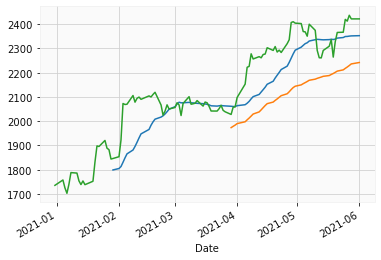

In [61]:
google['MA20'] = google['Open'].rolling(20).mean()
google['MA20'].plot(label = '20 days Moving Average')


google['MA60'] = google['Open'].rolling(60).mean()
google['MA60'].plot(label = '60 days Moving Average')

google['Open'].plot(label = 'Open price')


In [62]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2021,1,1)

gm = web.DataReader("GM",'yahoo',start,end)
tesla = web.DataReader("TSLA",'yahoo',start,end)
ford = web.DataReader("F",'yahoo',start,end)

In [63]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis = 1)
car_comp.columns = ['Tesla Open','Gm Open','Ford Open']

In [64]:
import seaborn as sns

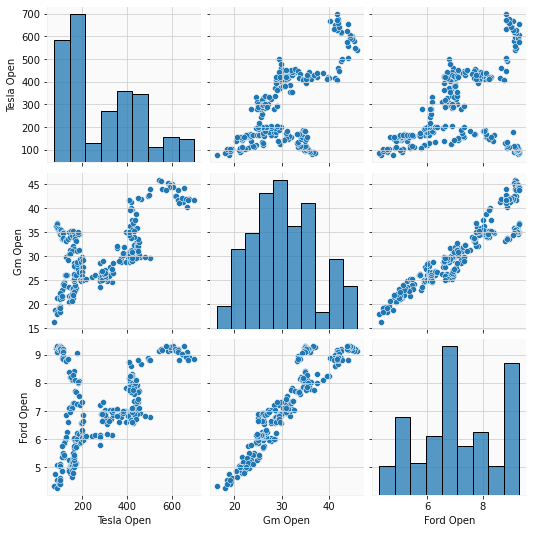

In [65]:
sns.pairplot(car_comp)

In [66]:
pip install alpha_vantage

In [67]:
from alpha_vantage.timeseries import TimeSeries

In [68]:
API_key = "KIH8MY12P2QGKGPW"

In [69]:
ts = TimeSeries(key = API_key, output_format = 'pandas')

In [71]:
data = ts.get_monthly_adjusted('MSFT')
data

(             1. open  2. high  3. low  4. close  5. adjusted close  \
 date                                                                 
 2021-10-05  282.1217  290.398  280.25    288.76           288.7600   
 2021-09-30  302.8650  305.320  281.62    281.92           281.9200   
 2021-08-31  286.3600  305.840  283.74    301.88           301.8800   
 2021-07-30  269.6100  290.150  269.60    284.91           284.3623   
 2021-06-30  251.2300  271.650  243.00    270.90           270.3792   
 ...              ...      ...     ...       ...                ...   
 2000-04-28   94.4400   96.500   65.00     69.75            22.1056   
 2000-03-31   89.6200  115.000   88.94    106.25            33.6734   
 2000-02-29   98.5000  110.000   88.12     89.37            28.3237   
 2000-01-31  117.3700  118.620   94.87     97.87            31.0176   
 1999-12-31   91.0600  119.940   90.87    116.75            37.0012   
 
                6. volume  7. dividend amount  
 date                      

In [73]:
data[0]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
date,,,,,,,
2021-10-05,282.1217,290.398,280.25,288.76,288.7600,8.643005e+07,0.00
2021-09-30,302.8650,305.320,281.62,281.92,281.9200,5.029312e+08,0.00
2021-08-31,286.3600,305.840,283.74,301.88,301.8800,4.403603e+08,0.56
2021-07-30,269.6100,290.150,269.60,284.91,284.3623,5.223030e+08,0.00
2021-06-30,251.2300,271.650,243.00,270.90,270.3792,5.083889e+08,0.00
...,...,...,...,...,...,...,...
2000-04-28,94.4400,96.500,65.00,69.75,22.1056,1.129073e+09,0.00
2000-03-31,89.6200,115.000,88.94,106.25,33.6734,1.014094e+09,0.00
2000-02-29,98.5000,110.000,88.12,89.37,28.3237,6.672438e+08,0.00


In [74]:
data[1]

{'1. Information': 'Monthly Adjusted Prices and Volumes',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2021-10-05',
 '4. Time Zone': 'US/Eastern'}

In [78]:
data[0].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
date,,,,,,,
2021-10-05,282.1217,290.398,280.25,288.76,288.7600,86430051.0,0.00
2021-09-30,302.8650,305.320,281.62,281.92,281.9200,502931199.0,0.00
2021-08-31,286.3600,305.840,283.74,301.88,301.8800,440360333.0,0.56
2021-07-30,269.6100,290.150,269.60,284.91,284.3623,522303043.0,0.00
2021-06-30,251.2300,271.650,243.00,270.90,270.3792,508388858.0,0.00


In [82]:
ts = TimeSeries(key = API_key, output_format = 'JSON')

data = ts.get_monthly_adjusted('MSFT')
data

({'2021-10-05': {'1. open': '282.1217',
   '2. high': '290.3980',
   '3. low': '280.2500',
   '4. close': '288.7600',
   '5. adjusted close': '288.7600',
   '6. volume': '86430051',
   '7. dividend amount': '0.0000'},
  '2021-09-30': {'1. open': '302.8650',
   '2. high': '305.3200',
   '3. low': '281.6200',
   '4. close': '281.9200',
   '5. adjusted close': '281.9200',
   '6. volume': '502931199',
   '7. dividend amount': '0.0000'},
  '2021-08-31': {'1. open': '286.3600',
   '2. high': '305.8400',
   '3. low': '283.7400',
   '4. close': '301.8800',
   '5. adjusted close': '301.8800',
   '6. volume': '440360333',
   '7. dividend amount': '0.5600'},
  '2021-07-30': {'1. open': '269.6100',
   '2. high': '290.1500',
   '3. low': '269.6000',
   '4. close': '284.9100',
   '5. adjusted close': '284.3623',
   '6. volume': '522303043',
   '7. dividend amount': '0.0000'},
  '2021-06-30': {'1. open': '251.2300',
   '2. high': '271.6500',
   '3. low': '243.0000',
   '4. close': '270.9000',
   '5. 